# Gender Clasification Model

The objective of this Notebook is to find the best KNN model to classificate images, modifying parameters as distance metrics and number of neighbors.

## Importing libraries

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

## Function to load the images, resize them, convert them to  grayscale and put them to a flatten array

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).resize((400, 600)).convert("L")
        img = np.array(img)
        images.append(img.flatten())  # Flatten the image data
        if "female" in folder:
            labels.append(1)
        else:
            labels.append(0)
    return images, labels

## Use the function to create imagen and labels for males and females

In [3]:
male_images, male_labels = load_images_from_folder('face dataset/male Faces/')
female_images, female_labels = load_images_from_folder("face dataset/female Faces/")

/home/dalopeza/.local/share/virtualenvs/Algebra_Taller1_Sebastian_David-Vxe6WzMv/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Divide the dataset into training and test

The model is trained with 80% of the data and test with the another 20%

In [4]:
X_train_males, X_test_males, y_train_males, y_test_males = train_test_split(male_images, male_labels, test_size=0.2, random_state=42)
X_train_females, X_test_females, y_train_females, y_test_females = train_test_split(female_images, female_labels, test_size=0.2, random_state=42)

In [5]:
# Combine male and female data
X_train=X_train_males+X_train_females
X_test=X_test_males+X_test_females
y_train=y_train_males+y_train_females
y_test=y_test_males+y_test_females

In [6]:
print(len(X_train+X_test))
print(len(X_train))

2133
1706


## Running the model with default parameters.

Acording to the documentation of scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The default parameters are:

**n_neighbors**=5 

**weights** = uniform

**p** = 2 

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

**metric** = minkowski with p=2 that is equivalent to use euclidian_distance

Metrics of the model with default parameters
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       218
           1       0.75      0.73      0.74       209

    accuracy                           0.75       427
   macro avg       0.75      0.75      0.75       427
weighted avg       0.75      0.75      0.75       427



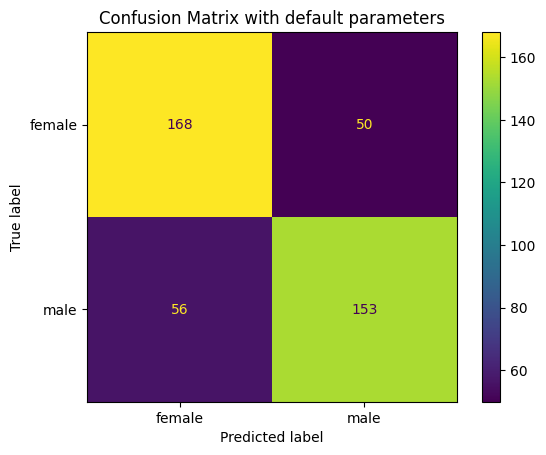

In [7]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
predicted_value=knn_model.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
cmd_3 = ConfusionMatrixDisplay(con_mat, display_labels=['female','male'])
cmd_3.plot()

plt.title("Confusion Matrix with default parameters")

# printing precision,recall,accuracy score etc
print("Metrics of the model with default parameters")
print(classification_report(y_test,predicted_value))

In [8]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("face dataset/New_pictures/female")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
female=0
for i, prediction in enumerate(test_predictions):
    if prediction==0:
        gender="Male"
    else:
        gender="Female"
        female+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=female/len(test_predictions)


print("Number of clasifications as females = ", female)
print("Real number of females = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)


# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("face dataset/New_pictures/male")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
male=0
for i, prediction in enumerate(test_predictions):
    if prediction==1:
        gender="Female"
    else:
        gender="Male"
        male+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=male/len(test_predictions)

print("\n")
print("Number of clasifications as males = ", male)
print("Real number of males = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as females =  199
Real number of females =  259
Number of pictures with good clasification =  0.7683397683397684


Number of clasifications as males =  247
Real number of males =  326
Number of pictures with good clasification =  0.7576687116564417


# Changing the parameters of the model in order to find the best combination of parameters

## Finding the best value for K with default distance parameters

In [9]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,16):  #Took the range of k from 1 to 15
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

error_rate

[0.16159250585480095,
 0.20140515222482436,
 0.22482435597189696,
 0.2693208430913349,
 0.24824355971896955,
 0.2786885245901639,
 0.2505854800936768,
 0.2529274004683841,
 0.26697892271662765,
 0.2810304449648712,
 0.2786885245901639,
 0.2693208430913349,
 0.26229508196721313,
 0.2786885245901639,
 0.28337236533957844]

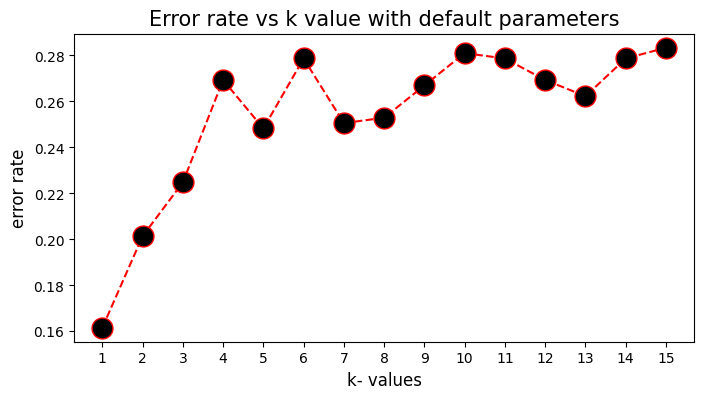

In [10]:
#plotting the error rate vs k graph 
plt.figure(figsize=(8,4))
plt.plot(range(1,16),error_rate,marker="o",markerfacecolor="black",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value with default parameters",fontsize=15)
plt.xlabel("k- values",fontsize=12)
plt.ylabel("error rate",fontsize=12)
plt.xticks(range(1,16))
plt.show()

**WITH DEFAULT PARAMETERS, THE BEST VALUE FOR K IS 1**

We will use this as reference to compare how the model improves changing the parameters

Metrics of the model with K=1
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       218
           1       0.84      0.83      0.83       209

    accuracy                           0.84       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.84      0.84       427



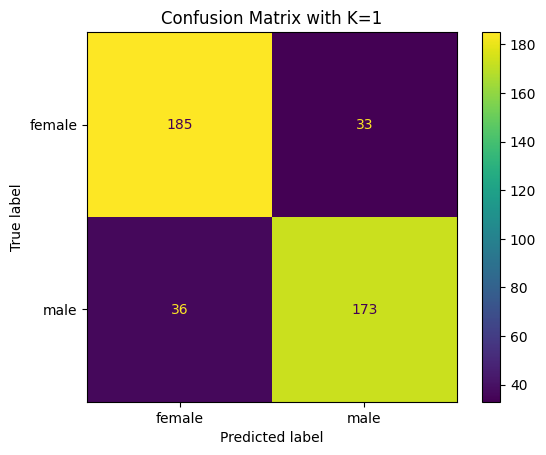

In [11]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
predicted_value=knn_model.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
cmd_3 = ConfusionMatrixDisplay(con_mat, display_labels=['female','male'])
cmd_3.plot()
plt.title("Confusion Matrix with K=1")

# printing precision,recall,accuracy score etc
print("Metrics of the model with K=1")
print(classification_report(y_test,predicted_value))

### Trying the model with new pictures

In [12]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("face dataset/New_pictures/female")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
female=0
for i, prediction in enumerate(test_predictions):
    if prediction==0:
        gender="Male"
    else:
        gender="Female"
        female+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=female/len(test_predictions)


print("Number of clasifications as females = ", female)
print("Real number of females = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)


# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("face dataset/New_pictures/male")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
male=0
for i, prediction in enumerate(test_predictions):
    if prediction==1:
        gender="Female"
    else:
        gender="Male"
        male+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=male/len(test_predictions)

print("\n")
print("Number of clasifications as males = ", male)
print("Real number of males = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as females =  242
Real number of females =  259
Number of pictures with good clasification =  0.9343629343629344


Number of clasifications as males =  307
Real number of males =  326
Number of pictures with good clasification =  0.941717791411043


## Changing the parameter `weights`

By default is ***uniform***, that means that all points are weighted equally. We are going to try using ***distance***, that means that closer neighbors of a point have greater influence than neighbors that are further away. Then evaluate the new optimus value for k

In [13]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,26):  #Took the range of k from 1 to 25
    clf=KNeighborsClassifier(n_neighbors=i,weights="distance")
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

error_rate

[0.16159250585480095,
 0.16159250585480095,
 0.1592505854800937,
 0.16393442622950818,
 0.14754098360655737,
 0.14754098360655737,
 0.14285714285714285,
 0.13114754098360656,
 0.14285714285714285,
 0.1358313817330211,
 0.14285714285714285,
 0.13114754098360656,
 0.1358313817330211,
 0.13114754098360656,
 0.13817330210772832,
 0.13114754098360656,
 0.14988290398126464,
 0.1405152224824356,
 0.1451990632318501,
 0.14754098360655737,
 0.15690866510538642,
 0.14988290398126464,
 0.1522248243559719,
 0.14988290398126464,
 0.1592505854800937]

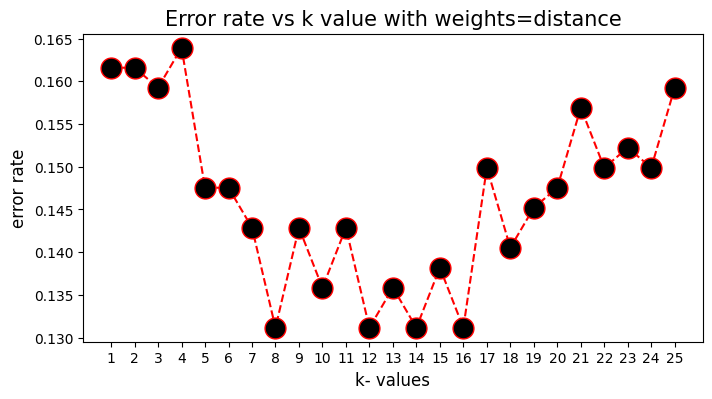

In [14]:
#plotting the error rate vs k graph 
plt.figure(figsize=(8,4))
plt.plot(range(1,26),error_rate,marker="o",markerfacecolor="black",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value with weights=distance",fontsize=15)
plt.xlabel("k- values",fontsize=12)
plt.ylabel("error rate",fontsize=12)
plt.xticks(range(1,26))
plt.show()

**We notice that the model with distance as weights and k=8 is better than the model with default parameters and k=1**

Metrics of the model with K=8 and weights=distance
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       218
           1       0.87      0.86      0.87       209

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



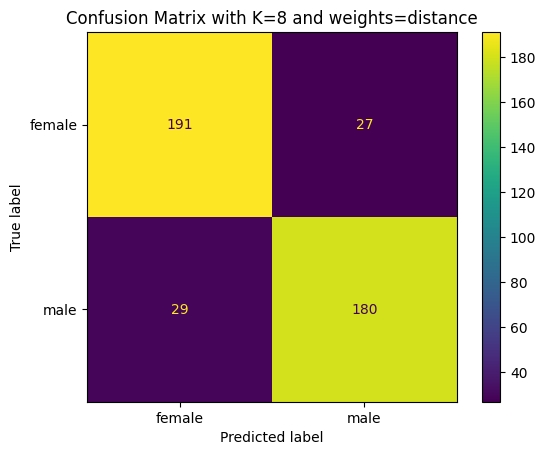

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=8,weights="distance")
knn_model.fit(X_train,y_train)
predicted_value=knn_model.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
cmd_3 = ConfusionMatrixDisplay(con_mat, display_labels=['female','male'])
cmd_3.plot()
plt.title("Confusion Matrix with K=8 and weights=distance")

# printing precision,recall,accuracy score etc
print("Metrics of the model with K=8 and weights=distance")
print(classification_report(y_test,predicted_value))

In [16]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("face dataset/New_pictures/female")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
female=0
for i, prediction in enumerate(test_predictions):
    if prediction==0:
        gender="Male"
    else:
        gender="Female"
        female+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=female/len(test_predictions)


print("Number of clasifications as females = ", female)
print("Real number of females = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)


# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("face dataset/New_pictures/male")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
male=0
for i, prediction in enumerate(test_predictions):
    if prediction==1:
        gender="Female"
    else:
        gender="Male"
        male+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=male/len(test_predictions)

print("\n")
print("Number of clasifications as males = ", male)
print("Real number of males = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as females =  245
Real number of females =  259
Number of pictures with good clasification =  0.9459459459459459


Number of clasifications as males =  310
Real number of males =  326
Number of pictures with good clasification =  0.950920245398773


## Changing the parameter `p` for the minikowski distance as metric

By default is ***2***, this means that the metric used to compute the distance is ***euclidean***. Changing the value for 1 means that the metric used will be manhatan distance.

Metrics of the model with K=8 and weights=distance and p=1
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       218
           1       0.85      0.82      0.84       209

    accuracy                           0.84       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.84      0.84       427



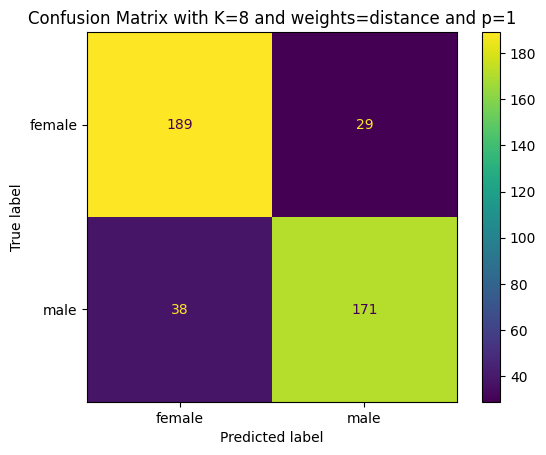

In [17]:
knn_model_test=KNeighborsClassifier(n_neighbors=8,weights="distance",p=1)
knn_model_test.fit(X_train,y_train)
predicted_value=knn_model_test.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
cmd_3 = ConfusionMatrixDisplay(con_mat, display_labels=['female','male'])
cmd_3.plot()
plt.title("Confusion Matrix with K=8 and weights=distance and p=1")

# printing precision,recall,accuracy score etc
print("Metrics of the model with K=8 and weights=distance and p=1")
print(classification_report(y_test,predicted_value))

**Is evident that the `euclidean distance` is better than the `manhattan distance`. That have sense, because there aren't "blocks" between the different observations**

## Evaluating another  `metric` for distance

According to the documentation, exists these options to calculate distance in KNN model:

![Alt text](image-1.png)

In summary, we could use **Euclidean**, **Manhattan**, **Cosine** and **Haversine**.

But, **Haversine** distance is only valid in 2 dimensions:

![Alt text](image-2.png)

Finally, the **Cosine** distance is a good choice to compute similarity of documents represented as tf-idf vectors. (https://scikit-learn.org/stable/modules/metrics.html#metrics).

![Alt text](image-3.png)

#### For those reasons, we conclude that the best metric for distance in this case is the **euclidean distance**

# Conclusion:

We can conclude that it is important to understand the parameters behind each model and modify them to evaluate which configuration best fits the problem we want to resolve.

In this specific case, we can conclude that the best KNN model is the one that uses `k`=8, `weights`=distance and `distance metric` = euclidean. (Minkowski distance with p=2)

We can see how the prediction results improved from the default model to the best found version.

**Results of default model**

***with test data***

![Alt text](image-4.png)

***with new data***

![Alt text](image-5.png)

**Results of best model**

***With test data***

![Alt text](image-6.png)

***With new data***

![Alt text](image-7.png)

## It is important to mention that the model was not overfitted, because it behaves very well with new data that had not been observed before